# Video pipeline with Yolo + Resnet Model

In [17]:
import os
import sys
from pprint import PrettyPrinter
import matplotlib.pyplot as plt
from typing import Dict, List
import numpy as np

pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
__file__ = globals()["_dh"][0]
project_dir = __file__ = globals()["_dh"][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, "..", "..", "..")))

from experiments.utils.constants import FINAL_RESULTS_PATH
from experiments.utils.parser import AdaptationParser
import experiments.utils.drawing

In [18]:
metaseries = 1
serieses = [400, 401, 402, 403, 404]

# series_names = None
series_names = {
    400: "IPA",
    401: "FA2-low",
    402: "FA2-high",
    # 403: "RIM-low",
    404: "RIM-high",
}

series_paths = {
series: os.path.join(FINAL_RESULTS_PATH, "metaseries", str(metaseries), "series", str(series))
    for series in serieses
}

loaders = {
series: AdaptationParser(
        series_path=series_path, model_name="video", type_of="router_pipeline"
    )
    for series, series_path in series_paths.items()
}

In [19]:
loaders

{400: <experiments.utils.parser.AdaptationParser at 0x7fe816098e20>,
 401: <experiments.utils.parser.AdaptationParser at 0x7fe89cb69460>,
 402: <experiments.utils.parser.AdaptationParser at 0x7fe89cb55760>,
 403: <experiments.utils.parser.AdaptationParser at 0x7fe811fedeb0>,
 404: <experiments.utils.parser.AdaptationParser at 0x7fe894bb8370>}

# Real Latencies

In [20]:
timeout_per_second = {}
per_second_results = {}
for series in serieses:
    timeout_per_second[series], per_second_results[series] = loaders[
        series
    ].per_second_result_processing()

In [21]:
metric = "p99"  # [min, max, p99]
metrics_all = {}
for series in serieses:
    metric_columns = list(
        filter(lambda col: metric in col, per_second_results[series].columns)
    )
    metrics_all[series] = per_second_results[series][metric_columns]
    metrics_all[series] = metrics_all[series].to_dict(orient="list")
ylabel = "Second"
data = {}
for serie, serie_name in series_names.items():
    data[serie_name] = metrics_all[serie]["e2e_p99"]

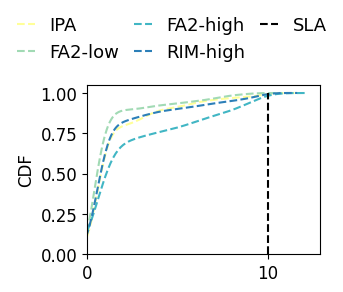

In [32]:
import importlib

importlib.reload(experiments.utils.drawing)


experiments.utils.drawing.draw_cdf(data, 10, vertical_label="SLA", bbox_to_anchor=(1.1, 1.5))